In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import numpy as np
import numpy.ma as ma

from netCDF4 import Dataset

## Plot a global map (typical cartopy example)

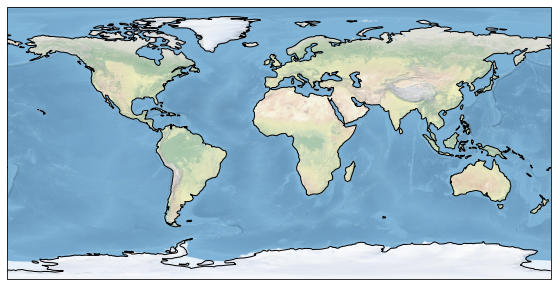

In [2]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# make the map global rather than have it zoom in to
# the extents of any plotted data

ax.set_global()
ax.stock_img()
ax.coastlines()


plt.show()

## Plot topography from simulation

In [3]:
# load topography

nc = Dataset('polgyr_grd.nc')


lon = nc.variables['lon_rho'][:]
lat =  nc.variables['lat_rho'][:]
h =  nc.variables['h'][:]
mask =  nc.variables['mask_rho'][:]; mask[mask==0] = np.nan

nc.close()

<ipython-input-3-69da9a0c1749>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = nc.variables['lon_rho'][:]
<ipython-input-3-69da9a0c1749>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat =  nc.variables['lat_rho'][:]
<ipython-input-3-69da9a0c1749>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence th

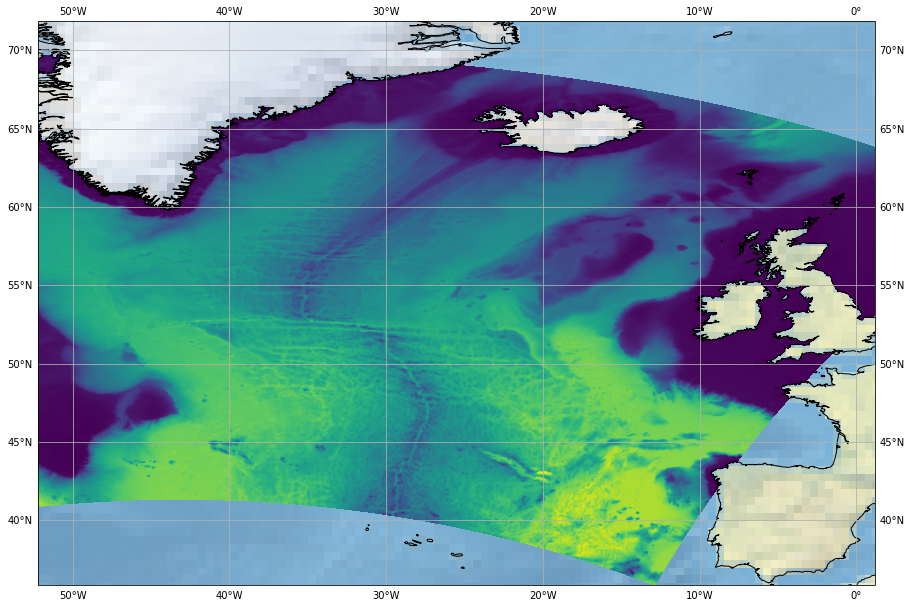

In [17]:
# plot topography as colors

fig = plt.figure(figsize=(15, 15))

projection = ccrs.PlateCarree() #ccrs.LambertConformal() 
#see other projections here: https://scitools.org.uk/cartopy/docs/latest/crs/projections.html

ax = plt.axes(projection=projection)
ax.set_extent([lon.min()+20, lon.max()-10, lat.min(), lat.max()]); 
ax.coastlines(resolution='10m')
ax.stock_img(); ax.gridlines(draw_labels=True)


CS1 = ax.pcolormesh(lon,lat, ma.masked_invalid(h * mask)
                             , transform=ccrs.PlateCarree(), rasterized=True)


<a list of 13 text.Text objects>

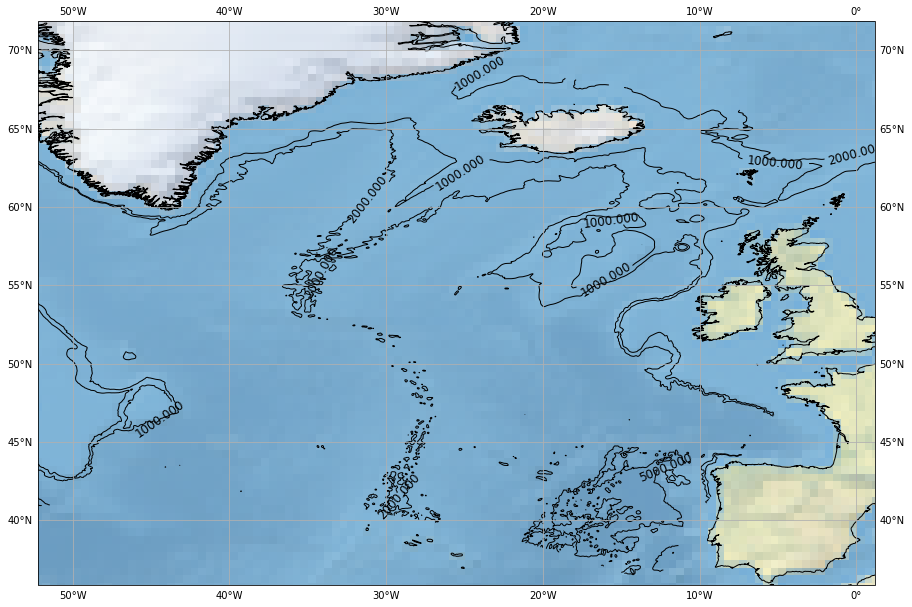

In [18]:
# plot topography as contours


fig = plt.figure(figsize=(15, 15))

projection = ccrs.PlateCarree() #ccrs.LambertConformal() 
#see other projections here: https://scitools.org.uk/cartopy/docs/latest/crs/projections.html

ax = plt.axes(projection=projection)
ax.set_extent([lon.min()+20, lon.max()-10, lat.min(), lat.max()]); 
ax.coastlines(resolution='10m')
ax.stock_img(); ax.gridlines(draw_labels=True)


CS1 = ax.contour(lon,lat, h * mask, [1000,2000,5000],colors = ('k',), linewidths = (1.,))
plt.clabel(CS1, fmt = '%2.3f', colors = 'k', fontsize=12)  
